# Initial Mushroom Exploratory Data Analysis

## Import Libraries and Functions

In [2]:
import pandas as pd
import numpy as np
import aiohttp
import logging
import json
from matplotlib import pyplot as plt
import requests, zipfile
import math
import seaborn as sns
import random
random.seed(42)

#import ml libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from xgboost import XGBClassifier

In [3]:
%load_ext kedro.extras.extensions.ipython

[07/22/22 18:04:44] INFO     Updated path to Kedro project: C:\Users\wvanbuskir002\Documents\7 -      ]8;id=234053;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=146316;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#53\53]8;;\
                             Other Research - Tech\Kedro\mushroom-classification                                   

[07/22/22 18:04:48] INFO     Kedro project Mushroom Classification                                    ]8;id=571858;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=91161;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=229258;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=243962;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#80\80]8;;\

In [4]:
%reload_kedro

                    INFO     No path argument was provided. Using: C:\Users\wvanbuskir002\Documents\7 ]8;id=750800;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=681453;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             - Other Research - Tech\Kedro\mushroom-classification                                 

[07/22/22 18:04:49] INFO     Kedro project Mushroom Classification                                    ]8;id=471029;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=617889;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=795667;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=844962;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\extras\extensions\ipython.py#80\80]8;;\

In [5]:
# Custom Heatmap Plot\r\n",
# Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec\r\n",
def corr_plot(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 11, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Read Data

In [6]:
df_raw = catalog.load("raw_mushrooms")
df_raw[df_raw['stalk-root'] == '?']
df_raw.shape

                    INFO     Loading data from 'raw_mushrooms' (CSVDataSet)...                  ]8;id=225772;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=800581;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

(8123, 23)

In [41]:
df = catalog.load("normalized_mushrooms")
df.head()

[07/23/22 12:21:21] INFO     Loading data from 'normalized_mushrooms' (CSVDataSet)...           ]8;id=995230;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=318594;file://c:\Users\wvanbuskir002\.conda\envs\kedro-PY37\lib\site-packages\kedro\io\data_catalog.py#344\344]8;;\

,edible,veil-color_w,veil-color_y,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p
0,1,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Data Profiling

In [8]:
df.shape

(5643, 99)

In [9]:
df_raw['concat'] = df_raw.apply(''.join,axis=1)
df_raw.head()

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,concat
0,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,exsytafcbkecsswwpwopnng
1,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,ebswtlfcbnecsswwpwopnnm
2,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,pxywtpfcnneesswwpwopksu
3,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,exsgfnfwbktesswwpwoenag
4,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,exyytafcbnecsswwpwopkng


In [10]:
df_raw.concat.value_counts().sum() - df_raw.shape[0]

#All rows are unique

0

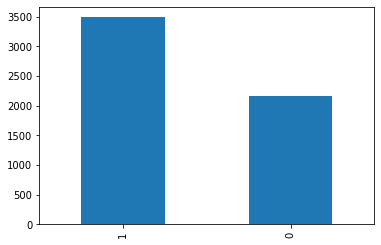

In [11]:
df.edible.value_counts().plot.bar()

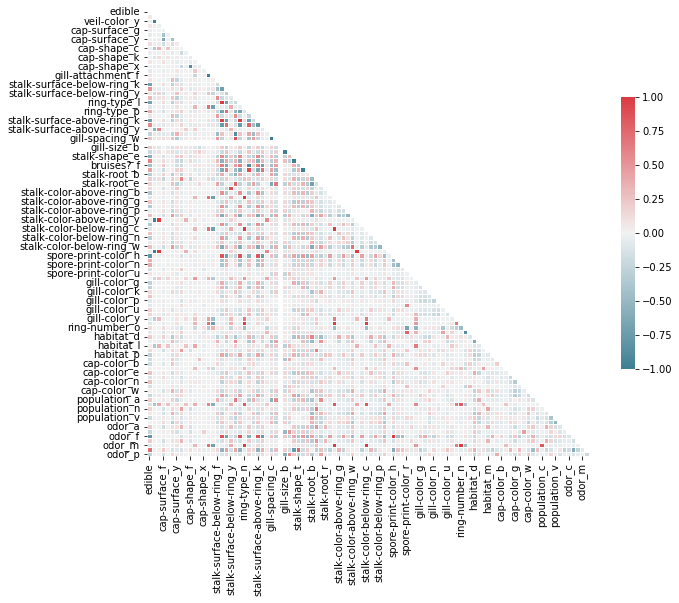

In [12]:
corr_plot(df)

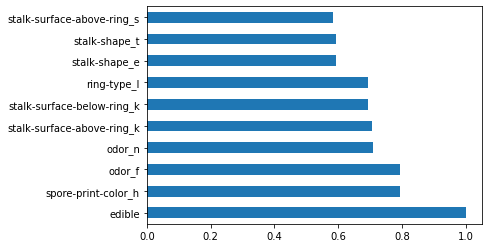

In [13]:
df.corr()['edible'].abs().sort_values(ascending = False).nlargest(10).plot.barh()

## Additional Data Analyses (e.g. Unsupervised)

### Try PCA and KMeans

In [14]:
pca_2 = PCA(n_components=2)
pca_2_df = pd.DataFrame(data = pca_2.fit_transform(df), columns = ['PC2_1', 'PC2_2'])

combined_df = pd.concat([df['edible'], pca_2_df], axis=1, join='inner')
combined_df.head()

,edible,PC2_1,PC2_2
0,1,-0.894990,0.791093
1,1,-1.143266,0.582130
2,0,-0.913699,0.771689
3,1,-1.043310,2.125275
4,1,-0.839902,0.418968


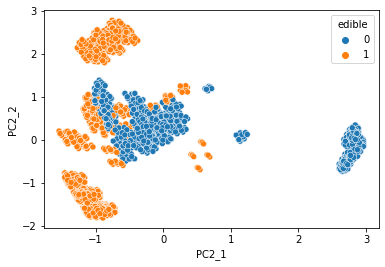

In [15]:
sns.scatterplot(x='PC2_1', y='PC2_2',hue='edible', data=combined_df)

## Modeling Considerations

# Model Trials

In [16]:
X = df.drop(columns = 'edible')
y = df.edible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_pca = combined_df.drop(columns= 'edible')
y_pca = combined_df.edible
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2)

### Random Forest

In [18]:
clf = RandomForestClassifier()
clf.fit(X = X_train, y=y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[426   0]
 [  0 703]]


In [19]:
clf_2 = RandomForestClassifier()
clf_2.fit(X = X_pca_train, y=y_pca_train)
y_pca_pred = clf_2.predict(X_pca_test)
print(confusion_matrix(y_true=y_pca_test, y_pred=y_pca_pred))

[[426  13]
 [  7 683]]


In [20]:

clf = RandomForestClassifier()
params = {'n_estimators': [50,150,200], 'max_depth': [15, 10, 5]}

grid = GridSearchCV(estimator=clf, param_grid=params)
grid.fit(X = X_train, y=y_train)

y_pred = grid.predict(X_test)
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


[[426   0]
 [  0 703]]


In [25]:
X_test

,veil-color_w,veil-color_y,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p
770,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2637,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
703,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
399,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1072,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5329,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4054,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2673,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


### XGBoost (Boosted Model)

In [54]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
predictions_xgb = [round(value) for value in y_pred_xgb]
accuracy = np.mean(predictions_xgb == y_test)
print(accuracy)

thresholds = (xgb_model.feature_importances_)
feature_filter = thresholds.astype(bool) 
print(len(thresholds))
print(X.columns[feature_filter])
desc_order = thresholds.argsort()
ranks = desc_order.argsort()
print(ranks[feature_filter])
print(len(ranks[feature_filter]))
print(min(ranks[feature_filter]))
print(98 - len(ranks[feature_filter]))
# thresholds

# filter_arr = thresholds > 0

# sig_features = thresholds[filter_arr]
# print(sig_features)
# for thresh in thresholds:
#     #select features
#     selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(X_train)

#     # train model
#     selection_model = XGBClassifier()
#     selection_model.fit(select_X_train, y_train)

#     # Eval model
#     select_X_test = selection.transform(X_test)
#     y_pred = selection_model.predict(select_X_test)
#     prediction = [round(value) for value in y_pred]
#     accuracy = np.mean(predictions_xgb == y_test)
#     print(accuracy)

1.0
98
Index(['cap-surface_f', 'cap-surface_s', 'cap-surface_y', 'cap-shape_x',
       'gill-attachment_a', 'stalk-surface-below-ring_s', 'ring-type_n',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'gill-spacing_c', 'gill-size_b',
       'stalk-shape_e', 'bruises?_f', 'stalk-root_b', 'stalk-root_c',
       'stalk-color-above-ring_w', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_r',
       'spore-print-color_w', 'gill-color_w', 'ring-number_o', 'habitat_d',
       'habitat_p', 'cap-color_n', 'cap-color_w', 'population_c',
       'population_v', 'population_y', 'odor_c', 'odor_n', 'odor_p'],
      dtype='object')
[81 68 64 66 75 69 93 85 70 89 67 96 94 78 77 80 74 97 76 71 92 82 65 95
 83 91 79 73 88 72 86 87 90 84]
34
64
64


### Deep Learning (Sequential Neural Network)

In [22]:
X_train = tf.convert_to_tensor(X_train)

X_val = scaler.transform(X_val)
X_val = tf.convert_to_tensor(X_val)

y_train = tf.convert_to_tensor(y_train)
y_val = tf.convert_to_tensor(y_val)

y_train = keras.utils.to_categorical(y_train, 3)
y_val = keras.utils.to_categorical(y_val, 3)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\wvanbuskir002\AppData\Local\Temp\ipykernel_1332\342929036.py:1 in <module>              │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\wvanbuskir002\\AppData\\Local\\Temp\\ipykernel_1332\\342929036.py'                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'tf' is not defined